The following notebook presents the Descriptive Statistics for the project of the course "Introduction to Business Analytics". This notebook is composed by two parts:

1. Statistics for the Prediction challange, in relation to the dataset "Urban Typologies"
2. Statistics for the Exploratory challange

# 1 Preliminary analysis on the Dataset "Cities.xls"

The dataset used for the prediction challange, comes from the "Urban Typologies" project, where there are 65 indicators that gives information about demographics, economy, and other fields. The dataset requires some data treatment in order to be analyzed. In fact, the dataset presents a lot of missing values, as well as categorical variables, different scales. Moreover, in the dataset it's possible to identify higly correlated columns that, if dropped, would avoid overfitting, while applying machine learning models to the data.

In this project, our target variable will be "CO2 Emissions per Capita (metric tonnes)".

In the first phase of our analysis we will carry out some data preparation of the original dataset in some different ways, in order to get different results from the application of the Sklearn regression models, and compare them. By doing this way, we can eventually figure out which data preparation fit best for our scope.

Firstly, we import the Python libruaries we need for the preliminary analysis, we upload the database and we analyze the columns of the dataset, that is the variables.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn import preprocessing

In [ ]:
path = "C:\\Users\\ALESSANDRO\\Desktop\\Intro to BA\\Project\\Cities.xls"
df = pd.read_excel(path, index_col="cityID")

In [ ]:
df.head()

,Unnamed: 0,City,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
cityID,,,,,,,,,,,,,,,,,,,,,
285,284,Baltimore(MD),7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
10,9,Melbourne,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
186,185,Niamey,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
328,327,Hanoi,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
67,66,Urumqi,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


To better visualize the features of the database that are going to be analyzed, the list of the columns will be printed: 

In [ ]:
for i in df: 
    print(i)

Unnamed: 0
City
clusterID
Typology
Country
Car Modeshare (%)
Public Transit Modeshare (%)
Bicycle Modeshare (%)
Walking Modeshare (%)
Gasoline Pump Price (USD/liter)
Road Deaths Rate (per 1000)
Subway Length (km)
Subway Length Density (per km)
Subway Stations per Hundred Thousand
Subway Ridership per Capita
Subway Age (years)
BRT Length (km)
BRT System Length Density (per km)
BRT Stations per Hundred Thousand Persons
BRT Fleet per Hundred Thousand Persons
BRT Annual Ridership per Capita
BRT Age (years)
Bikeshare Stations
Bikeshare Stations per Hundred Thousand Persons
Bikeshare Number of Bikes
Bikeshare Bicycles per Hundred Thousand Persons
Bikeshare Age (years)
Congestion (%)
Congestion AM Peak (%)
Congestion PM Peak (%)
Traffic Index
Travel Time Index
Inefficiency Index
Population
Land Area (sq. km)
Population Density (per sq. km)
Population Change 1990 – 2000
Population Change 2000 – 2010
Population Change 2010 – 2020
Population Change 2020 – 2025
Urbanization Rate 2015 (%)
Urbaniza

Firstly, we notice that some of the variables of the dataset could have a relationship between each other. For instance, it would make sense if the columns "Bikeshare Stations", "Bikeshare Stations per Hundred Thousand Persons", "Bikeshare Number of Bikes", "Bikeshare Bicycles per Hundred Thousand Persons", "Bikeshare Age (years)" would be higly correlated.

This observation has to be kept in mind in the following sections of Data Preparation.

In each section of the preliminary analysis of the dataset we will carry out a different data preparation approach on the dataset "Cities.xls".

## 1.1 First Data Preparation: dropping all the variables with NaNs

The first Data preparation analysis we've carried out is the simplest one.

In order to avoid to take assumptions that can make the prediction inaccurate, the first data preparation is based on dropping the columns of the dataset that contained NaNs values, so that we obtained a new Dataset with only consistent data.

In [ ]:
path = "C:\\Users\\ALESSANDRO\\Desktop\\Intro to BA\\Project\\Cities.xls"
df1 = pd.read_excel(path, index_col="cityID")

In [ ]:
split=int(len(df1)*0.75)
training_set = df1[:split]
test_set = df1[split:]

In [ ]:
df1.head()

,Unnamed: 0,City,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
cityID,,,,,,,,,,,,,,,,,,,,,
285,284,Baltimore(MD),7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
10,9,Melbourne,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
186,185,Niamey,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
328,327,Hanoi,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
67,66,Urumqi,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


Now, we drop from the dataset some columns, based on different criteria:

1. the variable "Unnamed: 0", which is the first column of the dataset, which is just an index and it doesn't gives information useful for our scope.
2. the variable "City", since the variable "CityID" is its associated "Nummy variable", and then it gives the same informationet, since it's give
3. The variables "Tipology" and "ClusterID".
4. the variables "Country". They are a non float variable, so we won't consider it in this first data preparation.
5. The variable "pollution index"

Eventually, we drop all the remaining variables that contain NaNs values:

In [ ]:
df1=df1.drop(['Unnamed: 0','Pollution Index ','City','clusterID','Typology','Country'], axis=1)
df1=df1.dropna(axis=1)

In [ ]:
df1.shape

(331, 25)

This first data preparation methodology has both positive and negative aspects. On one hand, it is really simple. It means that it is easy and it gives some information about the structure of the dataset, without make any assumption on the given data. In fact, those are not replaced by any value and at the end they are not "guessed". On the other hand, this method can lead to results that are not properly accurate, with R^2 values that are not high.

## 1.2 Second Data Preparation: dropping some of the variables with NaNs

In the second approach of the data preparation we will try to prepare the data in order to have more columns than the ones we had using the first method. The shape of the final dataset of the previous section df1 is (331, 25): only 25 features of the database had no NaNs.

The idea of this approach is dropping the columns with nans, but keeping those in which the number of NaNs is not that high. Then, we will manage somehow the rows having the remaining missing values. This approach should be a bit more accurate than the first, since it will keep more columns.

Choosing the proper number of "admitted" NaNs, it's possible to find a trade-off between the columns and rows to be dropped: finding the right balance is important in order to not drop high number of rows and eventually let the dataset be overfitted.

Let's start by uploading the file.

In [ ]:
path = "C:\\Users\\ALESSANDRO\\Desktop\\Intro to BA\\Project\\Cities.xls"
df2 = pd.read_excel(path)

As before, we drop the column "Unnamed: 0"

In [ ]:
df2=df2.drop(['Unnamed: 0'], axis=1)

In [ ]:
df2.shape

(331, 78)

It have been decided to manage the non-numeric features just by dropping them, in order to make the dataset as simple as possible. For this reason, the following lines of code have the aim to drop all the features that are not in a numeric format

In [ ]:
num_colums = ["int16","int32","int64","float16","float32","float64"] #data we want to retain in our dataset
numerical_columns = list(df2.select_dtypes(include=num_colums).columns) #we call the select_dtypes() method on our dataset and pass it the num_colums list that contains the type of columns that we want to retain. The select_dtypes() method will return the names of the specified numeric columns, which we store in the list numeric_columns
# numerical_columns.append("Country")
df2 = df2[numerical_columns] #Next, we filter our columns from paribas_data dataframe with the help of the numerical_colums list. Let's print the shape of the paribas_data dataframe to see how many numeric columns do we have, execute the following script

# This lines of code have been taken from: https://michael-fuchs-python.netlify.app/2019/08/20/dealing-with-outliers/

We define a list containting the features of the original dataset, and we split the original dataset in training set and test set:

In [ ]:
tot_features = df2.columns.drop('CO2 Emissions per Capita (metric tonnes)')
print("The total number of features (only numbers) is: ", len(tot_features))
# print(tot_features)

tot_training_set = df2.iloc[:(int(len(df2)*(0.75))),:]
# print("Training set: ", tot_training_set.shape)
# test_set = df.head(int(len(df)*(0.25)))
tot_test_set = df2.iloc[(int(len(df2)*(0.75))):,:]
# print("Test set: ", tot_test_set.shape)

The total number of features (only numbers) is:  51


The next step is to drop the columns that contain more than a fixed number of missing values. In this specific case will be used as a treshold 300. In other words, over 336 records of each column, it will be allowed that at most 36 of them are NaNs.

Then, in order to manage the remaining missing values in the dataset, two paths can be followed:
1. Drop the rows that contain NaNs. It is now possible, since the remaining missing values will be few, hence the model wouldn't drop a lot of rows with the risk to overfit the model
2. Fill the NaNs values.

In this analysis, it will be chosen to follow this second methodology: the remaining NaNs values will be filled with the mean of the respective column. In this way, some data will be "guessed", can make the model less reliable, but on the other hand it avoid overfitting problems, due to the shape of the dataset.

In [ ]:
df2 = df2.dropna(1, thresh=300) #drop the columns that have less than 300 non nan values

for i in df2.columns:
    if i != "Country":
        df2[i].fillna(df2[i].mean(), inplace = True)

print(df2.shape)

(331, 52)


The dataset will be now splitted into training and test sets, since for the following analysis will be only focused on the training set. In fact, by focusing on the whole dataset would mean "cheeting", that is using the test set in order to get information for the models to be used:

In [ ]:
training_set = df2.iloc[:(int(len(df2)*(0.75))),:]
print("Training set: ", training_set.shape)
# test_set = df.head(int(len(df)*(0.25)))
test_set = df2.iloc[(int(len(df2)*(0.75))):,:]
print("Test set: ", test_set.shape)
print(df2.shape)

Training set:  (248, 52)
Test set:  (83, 52)
(331, 52)


Now we define two new lists, containing respectively the labels of the features left in the dataset, and the ones that have been dropped:

In [ ]:
features = training_set.columns.drop('CO2 Emissions per Capita (metric tonnes)')
# featuress = features.drop("Country") # It will be used for the exploratory component.
print("The features left in the dataset are:")
print("---------------------------")
for i in features:
    print(i)

out_features = []
for i in tot_features:
    if i not in features:
        out_features.append(i)
print("\n")
print("The dropped features are:")
print("-------------------------")
for i in out_features:
    print(i)

The features left in the dataset are:
---------------------------
cityID
clusterID
Gasoline Pump Price (USD/liter)
Road Deaths Rate (per 1000)
Subway Length (km)
Subway Length Density (per km)
Subway Stations per Hundred Thousand
Subway Ridership per Capita
Subway Age (years)
BRT Length (km)
BRT System Length Density (per km)
BRT Stations per Hundred Thousand Persons
BRT Fleet per Hundred Thousand Persons
BRT Annual Ridership per Capita
BRT Age (years)
Bikeshare Stations per Hundred Thousand Persons
Bikeshare Number of Bikes
Bikeshare Bicycles per Hundred Thousand Persons
Bikeshare Age (years)
Population
Land Area (sq. km)
Population Density (per sq. km)
Population Change 1990 – 2000
Population Change 2000 – 2010
Population Change 2010 – 2020
Population Change 2020 – 2025
Urbanization Rate 2015 (%)
Urbanization Rate Change 2015 – 2025 (pp)
GDP per Capita (USD)
Life Expectancy (years)
Internet Penetration
Digital Penetration
Street length total (m)
Street Length Density (m/sq. km)
Stree

It could be intresting to investigate which of the columns belonging to our model are highly correlated with the target variable. In this context we can consider two variables highly correlated if their correlation is higher than 0.6:

In [ ]:
for i in featuress:
    if training_set.corr()['CO2 Emissions per Capita (metric tonnes)'].loc[i] > 0.6:
        print(i, "------>", training_set.corr()['CO2 Emissions per Capita (metric tonnes)'].loc[i])

GDP per Capita (USD) ------> 0.7267533262372405
Internet Penetration ------> 0.6574082742231928
Digital Penetration ------> 0.6938454461389615
Development Factor ------> 0.7434317975983964


The results are quite intresting: it can be observed that the economic developement on a city and the digitalization have a statistical correlation with the CO2 emissions.

From a logical point of view, it make sense that the economic situation of a country affects the CO2 emissions, since a higher developement of a region is linked to high levels of industrialization or development of transportation means.

On the other hand, the digitalization level of a country could depend on the developement of a country, and eventually could be indirectly connected to the CO2 emissions.

Moreover, we can observe that the higly correlated features of the model are logically correlated in couples: the GDP could affect the Developement factor, while the Digital Penetration could be affected by the internet penetration. Let's see if exists a mathematical correlation between this pairs of variables.

In [ ]:
print("The correlation between Internet penetration and Digital Penetration is: ", training_set.corr()['Internet Penetration'].loc["Digital Penetration"])
print("The correlation between GDP and Developement factor is: ", training_set.corr()['Development Factor'].loc["GDP per Capita (USD)"])

The correlation between Internet penetration and Digital Penetration is:  0.8633460406523973
The correlation between GDP and Developement factor is:  0.9429174189647408


Therefore, from the analysis that have been carried out until now, it can be supposed that the variable developement factor summarizes the others:

In [ ]:
print("The correlation between Digital penetration and Developement Factor is: ", training_set.corr()['Development Factor'].loc["Digital Penetration"])
print("The correlation between Internet Penetration and Developement Factor is: ", training_set.corr()['Development Factor'].loc["Internet Penetration"])
print("The correlation between GDP per Capita (USD) and Developement Factor is: ", training_set.corr()['Development Factor'].loc["GDP per Capita (USD)"])
print("-----------------------------------------------------------------------------------------------------------------------------")
print("The correlation between Digital penetration and the target variable is: ", training_set.corr()['Development Factor'].loc["CO2 Emissions per Capita (metric tonnes)"])

The correlation between Digital penetration and Developement Factor is:  0.925366899888291
The correlation between Internet Penetration and Developement Factor is:  0.85341661512341
The correlation between GDP per Capita (USD) and Developement Factor is:  0.9429174189647408
-----------------------------------------------------------------------------------------------------------------------------
The correlation between Digital penetration and the target variable is:  0.7434317975983964


In [ ]:
for i in features:
    for j in features:
        if i> j:
            if abs(training_set.corr()[j].loc[i]) >0.8:
                print(i,j, "------>", training_set.corr()[j].loc[i])

Subway Length (km) Metro Propensity Factor ------> 0.8141278376503099
Subway Ridership per Capita Metro Propensity Factor ------> 0.874006043955435
Subway Age (years) Metro Propensity Factor ------> 0.8408192322952762
Bikeshare Number of Bikes Bikeshare Bicycles per Hundred Thousand Persons ------> 0.9353173505985887
Population Change 2000 – 2010 Population Change 1990 – 2000 ------> 0.9034980529090931
Population Change 2010 – 2020 Population Change 1990 – 2000 ------> 0.8850599302769458
Population Change 2010 – 2020 Population Change 2000 – 2010 ------> 0.9735614517308557
Population Change 2020 – 2025 Population Change 1990 – 2000 ------> 0.8101998638740698
Population Change 2020 – 2025 Population Change 2000 – 2010 ------> 0.8833948231360201
Population Change 2020 – 2025 Population Change 2010 – 2020 ------> 0.9450765209980755
Urbanization Rate 2015 (%) Digital Penetration ------> 0.8027517672355843
GDP per Capita (USD) Digital Penetration ------> 0.8596772950199729
GDP per Capita (U

In [ ]:
features = features.drop("Population Change 1990 – 2000")
features = features.drop("Population Change 2000 – 2010")
features = features.drop("Population Change 2010 – 2020")
features = features.drop("Population Change 2020 – 2025")

Similarly, we can find those features that are really low correlated with the target variable:

In [ ]:
for i in featuress:
    if abs(training_set.corr()['CO2 Emissions per Capita (metric tonnes)'].loc[i]) < 0.1:
        print(i, "------>", training_set.corr()['CO2 Emissions per Capita (metric tonnes)'].loc[i])

Subway Length Density (per km) ------> 0.03034115814446645
Subway Ridership per Capita ------> 0.07557048054724667
BRT Length (km) ------> -0.014601096740745834
BRT Stations per Hundred Thousand Persons ------> 0.022648393609360853
BRT Fleet per Hundred Thousand Persons ------> -0.014455580950252244
BRT Annual Ridership per Capita ------> -0.09707263711771068
BRT Age (years) ------> 0.012324949105960676
Street length total (m) ------> 0.00478445071404832
Street Length Average (m) ------> 0.030112652387831996
Intersection Count ------> -0.027652294467253837
Intersection Density (per sq. km) ------> -0.008021001651851664
Circuity ------> 0.02717061743141412
Metro Propensity Factor ------> 0.09764925106179326
BikeShare Propensity Factor ------> -0.038282745473379766


In [ ]:
print("The correlation between Subway Length Density (per km) and Subway Ridership per Capita is: ", training_set.corr()['Subway Length Density (per km)'].loc["Subway Ridership per Capita"])

The correlation between Subway Length Density (per km) and Subway Ridership per Capita is:  0.7275172168634755


Their correlation is quite high. We can consider to drop one, let's say the Subway Length Density (per km) which is the less correlated with the target variable

In [ ]:
features = features.drop("Subway Length Density (per km)")

KeyError: "['Subway Length Density (per km)'] not found in axis"

We can expect that all the features related to the BRT are correlated among each others. Let's produce a code to check the correlations:

In [ ]:
BRT = ["BRT Length (km)", "BRT Stations per Hundred Thousand Persons", "BRT Fleet per Hundred Thousand Persons", "BRT Annual Ridership per Capita", "BRT Age (years)"]

for i in BRT:
    for j in BRT:
        if i> j:
            if training_set.corr()[j].loc[i] >= 0.55:
                print(i," ---- ", j, ">>>>>>>", training_set.corr()[j].loc[i])

BRT Stations per Hundred Thousand Persons  ----  BRT Annual Ridership per Capita >>>>>>> 0.624691451032491
BRT Fleet per Hundred Thousand Persons  ----  BRT Annual Ridership per Capita >>>>>>> 0.7434252385525469
BRT Fleet per Hundred Thousand Persons  ----  BRT Age (years) >>>>>>> 0.5810110807870822
BRT Annual Ridership per Capita  ----  BRT Age (years) >>>>>>> 0.5777837563759317


Analyzing the correlations, it is possible to see that some features related to the BRT can be removed. In this case the threshold of the correlation value can be lower (0.55), since the correlation between these features and the target variable is not veri high, then the database won't lose a lot of information.

In [ ]:
features = features.drop("BRT Fleet per Hundred Thousand Persons")
features = features.drop("BRT Annual Ridership per Capita")

It can be noticed that the features that have been dropped are those related with the most of the others.

What about the Bikeshare data? We can expect that the variable "BikeShare Propensity Factor" summarizes the other information about the Bikeshare:

In [ ]:
bikeshare = ["Bikeshare Stations per Hundred Thousand Persons", "Bikeshare Number of Bikes", "Bikeshare Bicycles per Hundred Thousand Persons"]

for i in bikeshare:
        print(i, " and BikeShare Propensity Factor ", "------>", training_set.corr()[i].loc["BikeShare Propensity Factor"])

Bikeshare Stations per Hundred Thousand Persons  and BikeShare Propensity Factor  ------> 0.6931241411179951
Bikeshare Number of Bikes  and BikeShare Propensity Factor  ------> 0.6999344520522525
Bikeshare Bicycles per Hundred Thousand Persons  and BikeShare Propensity Factor  ------> 0.7426593206796572


The correlation between the BikeShare Propensity Factor and the others Bikeshare variablesare high enough. For that reason we could drop all the Bikeshare variables, but the BikeShare Propensity Factor:

In [ ]:
features = features.drop(bikeshare)

In [ ]:
street = ["Street length total (m)", "Street Length Average (m)", "Intersection Count", "Intersection Density (per sq. km)"]

for i in street:
    for j in street:
        if i> j:
            print(i, " and ",j, "------>", training_set.corr()[j].loc[i])

Street length total (m)  and  Street Length Average (m) ------> 0.12682784803369687
Street length total (m)  and  Intersection Count ------> 0.9092018002602439
Street length total (m)  and  Intersection Density (per sq. km) ------> -0.23523898350071126
Street Length Average (m)  and  Intersection Count ------> -0.11073647449014239
Street Length Average (m)  and  Intersection Density (per sq. km) ------> -0.23527764337965146
Intersection Density (per sq. km)  and  Intersection Count ------> -0.23996377826132323


The output shows that there is a high correlation between the intersection count and the street lenght total.

In [ ]:
print("Street length total (m)", " and ","CO2 Emissions per Capita (metric tonnes)", "------>", training_set.corr()["CO2 Emissions per Capita (metric tonnes)"].loc["Street length total (m)"])
print("Intersection Count", " and ","CO2 Emissions per Capita (metric tonnes)", "------>", training_set.corr()["CO2 Emissions per Capita (metric tonnes)"].loc["Intersection Count"])

Street length total (m)  and  CO2 Emissions per Capita (metric tonnes) ------> 0.00478445071404832
Intersection Count  and  CO2 Emissions per Capita (metric tonnes) ------> -0.027652294467253837


We will drop the variable "Street length total (m)":

In [ ]:
features = features.drop("Street length total (m)")

Therefore, the final dataset will have the following features:

In [ ]:
for i in features:
    print(i)
print(len(features))

cityID
clusterID
Gasoline Pump Price (USD/liter)
Road Deaths Rate (per 1000)
Subway Length (km)
Subway Stations per Hundred Thousand
Subway Ridership per Capita
Subway Age (years)
BRT Length (km)
BRT System Length Density (per km)
BRT Stations per Hundred Thousand Persons
BRT Age (years)
Bikeshare Age (years)
Population
Land Area (sq. km)
Population Density (per sq. km)
Urbanization Rate 2015 (%)
Urbanization Rate Change 2015 – 2025 (pp)
GDP per Capita (USD)
Life Expectancy (years)
Internet Penetration
Digital Penetration
Street Length Density (m/sq. km)
Street Length Average (m)
Intersection Count
Intersection Density (per sq. km)
Degree Average
Streets per Node
Circuity
Self-Loop Proportion
Highway Proportion
Metro Propensity Factor
BRT Propensity Factor
BikeShare Propensity Factor
Development Factor
Sustainability Factor
Population Factor
Congestion Factor
Sprawl Factor
Network Density Factor
40


# 2 Predictive Component

## 2.1 Linear Regression Model

In [ ]:
df2[features].describe()

,cityID,clusterID,Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,...,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,166.000000,5.567976,1.053988,14.707576,38.872356,0.729446,25.634767,16.199396,10.533455,0.013815,...,0.016953,0.195855,0.173344,0.398780,0.416785,0.381920,0.171709,0.491645,0.492904,0.412400
std,95.695698,3.591750,0.424823,8.705650,77.291871,1.224042,48.264312,27.430951,25.055781,0.033927,...,0.015936,0.195584,0.148059,0.078614,0.266073,0.153003,0.159347,0.189305,0.227212,0.151951
min,1.000000,1.000000,0.010000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.500000,2.000000,0.705000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001145,0.067857,0.078734,0.358541,0.213589,0.281133,0.055895,0.366844,0.309768,0.319600
50%,166.000000,6.000000,1.050000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015341,0.106605,0.139255,0.390862,0.341371,0.341087,0.120180,0.533182,0.473091,0.394053
75%,248.500000,8.000000,1.315000,20.400000,42.550000,1.137465,25.739660,25.000000,8.100000,0.010125,...,0.026095,0.277798,0.190673,0.423609,0.706330,0.450211,0.248221,0.640847,0.679550,0.474617
max,331.000000,12.000000,2.120000,37.200000,588.000000,9.797980,326.159420,127.000000,207.000000,0.234286,...,0.082444,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train = training_set[features]
y_train = training_set[['CO2 Emissions per Capita (metric tonnes)']]
print("Train: ", x_train.shape, y_train.shape)
print("----------------------------")
x_test = test_set[features]
y_test = test_set[['CO2 Emissions per Capita (metric tonnes)']]
print("Test: ", x_test.shape, y_test.shape)

Train:  (248, 40) (248, 1)
----------------------------
Test:  (83, 40) (83, 1)


In [ ]:
lr=linear_model.LinearRegression(fit_intercept=False)
lr.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
MSE = mean_squared_error(y_pred, y_test)

In [ ]:
MSE

18.72869305848098

In [ ]:
lr.score(x_train, y_train)

0.7868923914183346

In [ ]:
lr.score(x_test, y_test)

0.6306530510654582

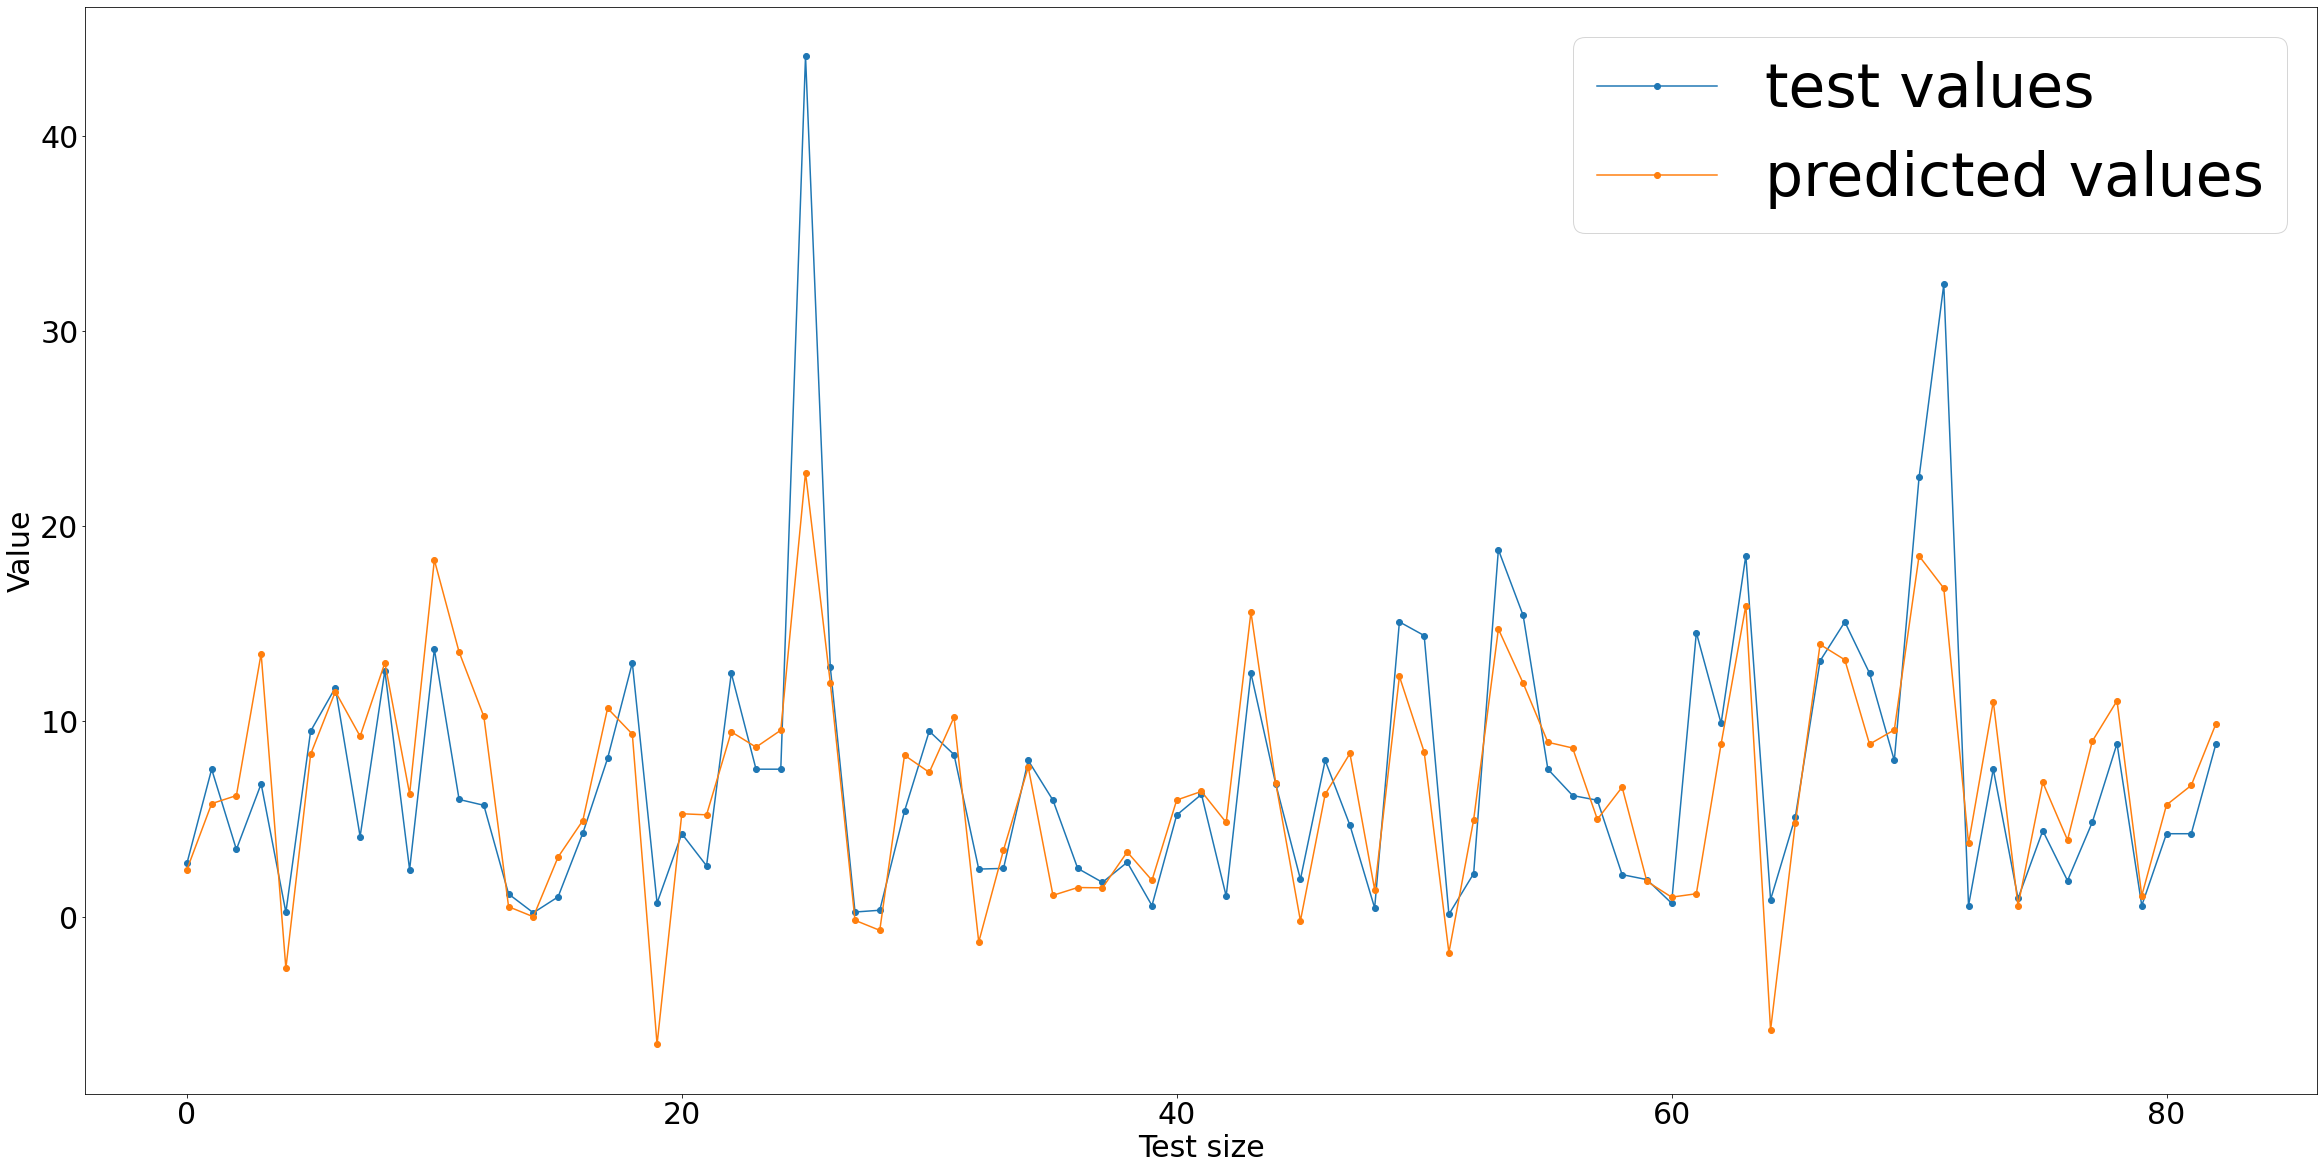

In [ ]:
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_test)), y_test, label="test values", marker="o")
plt.plot(np.arange(len(y_pred)), y_pred, label="predicted values", marker="o")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("Test size", size=30)
plt.ylabel("Value", size=30)
plt.show()

Here I am going to evaluate the regression, in particular the error on the test set and the variance of the error between the prediction and the true value

In [ ]:
error_reg = y_pred - y_test
print("Expected value of the error: %.2f" % np.mean(error_reg))
print("variance of data is:", np.var(error_reg))

Expected value of the error: -0.30
variance of data is: CO2 Emissions per Capita (metric tonnes)    18.635783
dtype: float64


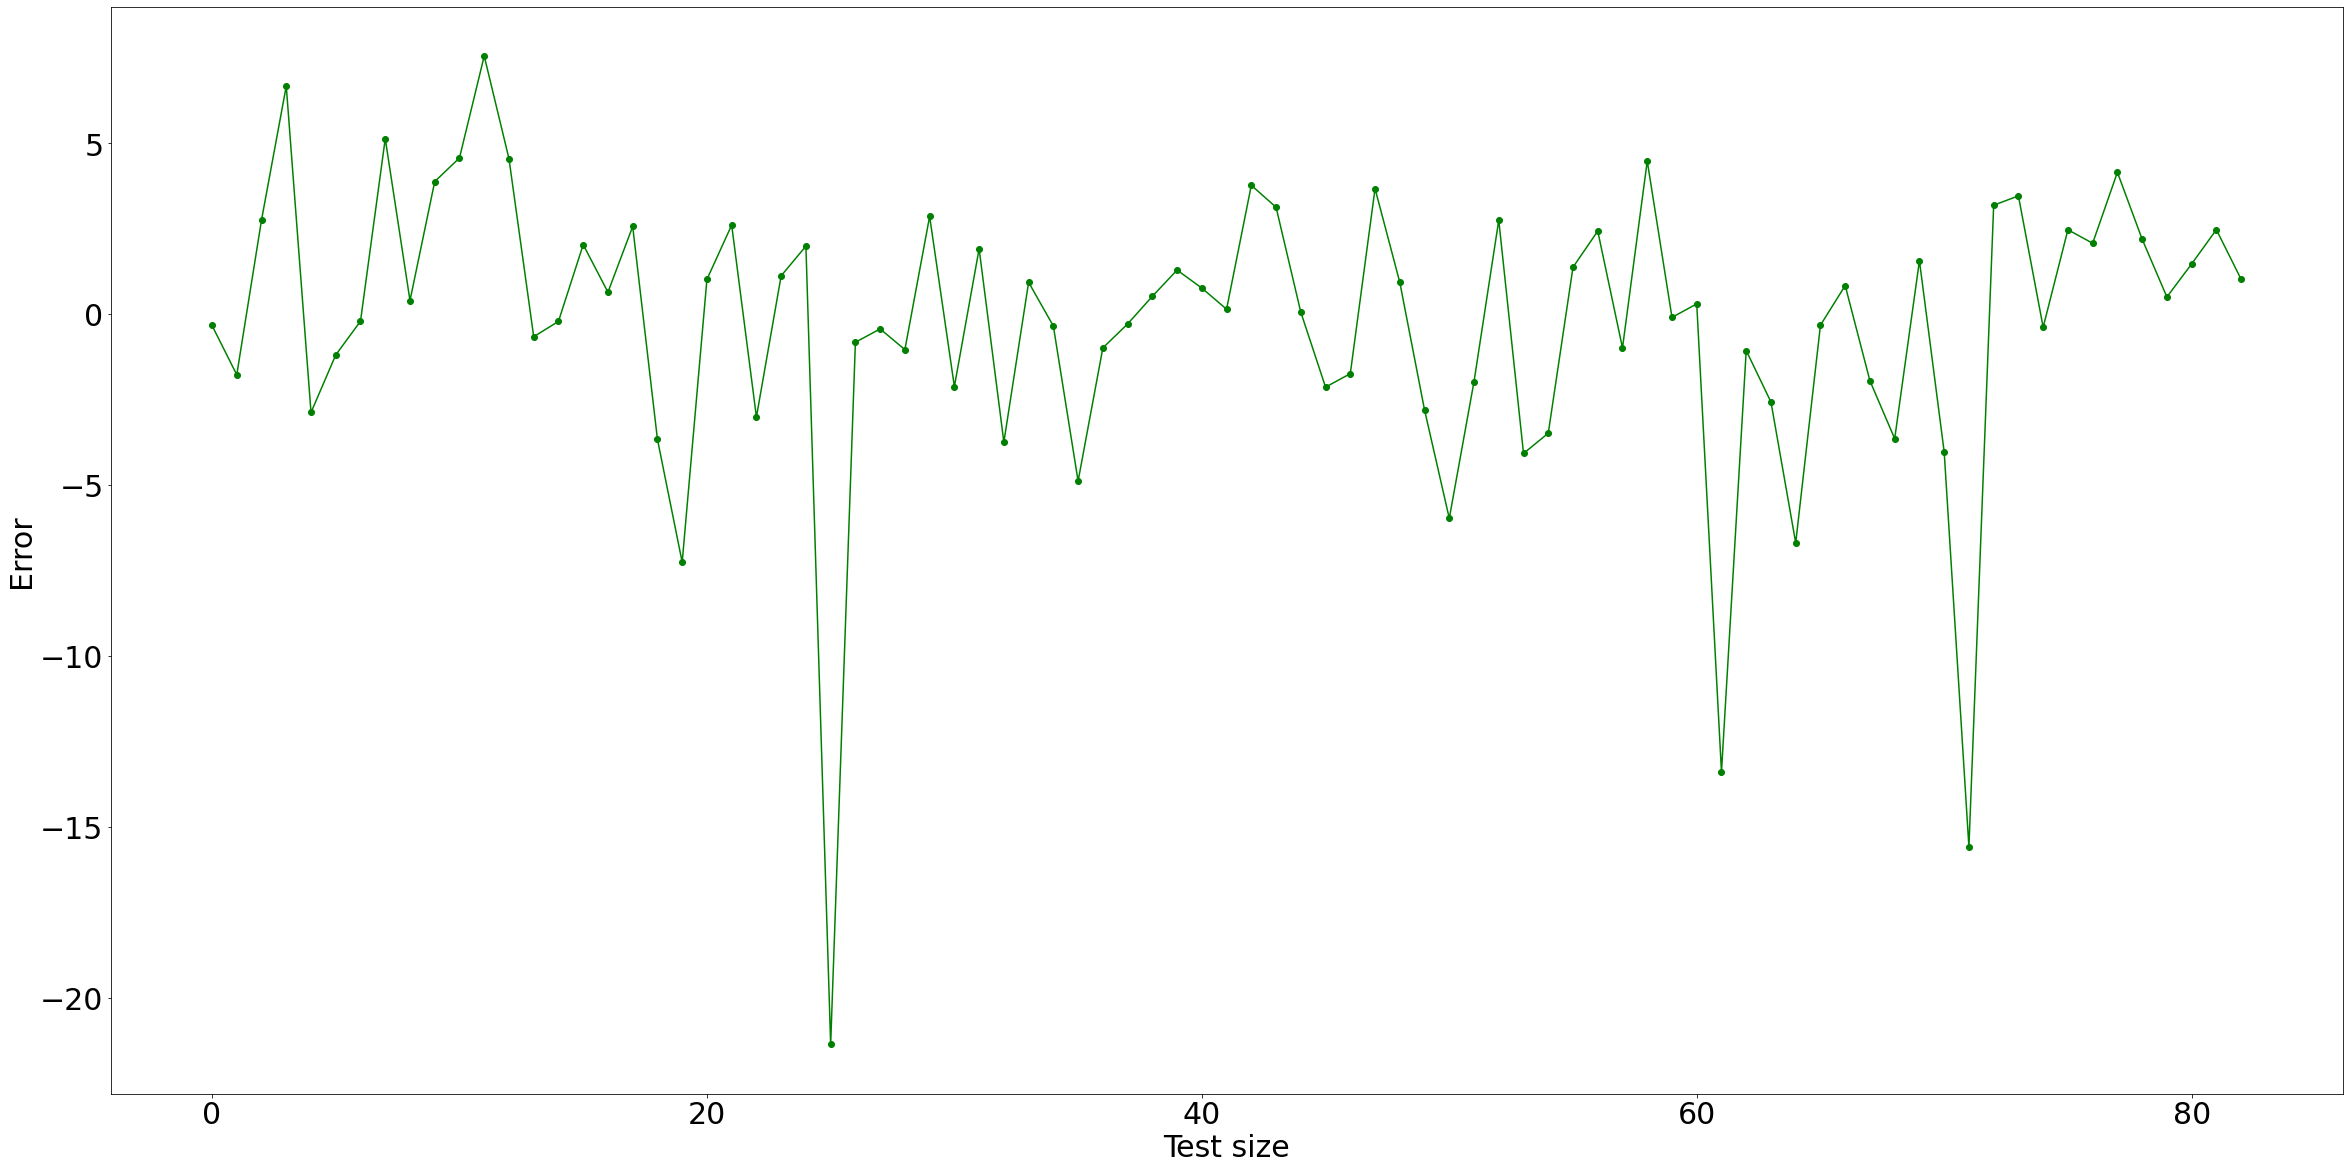

In [ ]:
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_test)), error_reg, marker="o", c="g")
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("Test size", size=30)
plt.ylabel("Error", size=30)
plt.show()

It can be noticed that, comparing the two plots, the highest errors given by the model are observed when outliers occurs.

## 2.2 Neural Network model for regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x = x_train
y = y_train
l = int(0.75*len(x_train))
x_train = x[:l]
x_val = x[l:]
y_train = y[:l]
y_val = y[l:]
x_test = sc.transform(x_test)

In [ ]:
print("Shape x_train: ", x_train.shape)
print("Shape x_val: ", x_val.shape)
print("Shape x_test: ", x_test.shape)
print("------------------------")
print("Shape y_train: ", y_train.shape)
print("Shape y_val: ", y_val.shape)
print("Shape y_test: ", y_test.shape)

Shape x_train:  (186, 40)
Shape x_val:  (62, 40)
Shape x_test:  (83, 40)
------------------------
Shape y_train:  (186, 1)
Shape y_val:  (62, 1)
Shape y_test:  (83, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# model = Sequential()

# model.add(Dense(100, input_dim=46, activation='linear'))
# model.add(Dropout(rate=0.5))
# model.add(Dense(100, input_dim=46, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.add(Dense(1, input_dim=46, activation='linear'))
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss')
# history = model.fit(x_train, y_train, epochs=300, batch_size=128, validation_data=(x_val,y_val), callbacks=[es])

model = Sequential()

model.add(Dense(40, input_dim=40, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(40, input_dim=50, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, input_dim=50, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss')
history = model.fit(x_train, y_train, epochs=1000, batch_size=128, validation_data=(x_val,y_val), callbacks=[es])

Epoch 1/1000
2/2 [==============================] - 0s 113ms/step - loss: 103.2759 - accuracy: 0.0000e+00 - val_loss: 91.1618 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 100.6017 - accuracy: 0.0000e+00 - val_loss: 88.7211 - val_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 17ms/step - loss: 95.6503 - accuracy: 0.0000e+00 - val_loss: 86.3262 - val_accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 17ms/step - loss: 95.4417 - accuracy: 0.0000e+00 - val_loss: 83.9823 - val_accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 17ms/step - loss: 97.0771 - accuracy: 0.0000e+00 - val_loss: 81.7217 - val_accuracy: 0.0000e+00
Epoch 6/1000
2/2 [==============================] - 0s 15ms/step - loss: 88.4178 - accuracy: 0.0000e+00 - val_loss: 79.5259 - val_accuracy: 0.0000e+00
Epoch 7/1000
2/2 [==============================] - 0s 17ms/step - loss: 89.0045 - accuracy

Epoch 55/1000
2/2 [==============================] - 0s 15ms/step - loss: 25.3662 - accuracy: 0.0000e+00 - val_loss: 17.2476 - val_accuracy: 0.0000e+00
Epoch 56/1000
2/2 [==============================] - 0s 12ms/step - loss: 26.1147 - accuracy: 0.0000e+00 - val_loss: 17.2129 - val_accuracy: 0.0000e+00
Epoch 57/1000
2/2 [==============================] - 0s 10ms/step - loss: 27.9533 - accuracy: 0.0000e+00 - val_loss: 17.1766 - val_accuracy: 0.0000e+00
Epoch 58/1000
2/2 [==============================] - 0s 11ms/step - loss: 30.7096 - accuracy: 0.0000e+00 - val_loss: 17.1415 - val_accuracy: 0.0000e+00
Epoch 59/1000
2/2 [==============================] - 0s 11ms/step - loss: 32.0407 - accuracy: 0.0000e+00 - val_loss: 17.1097 - val_accuracy: 0.0000e+00
Epoch 60/1000
2/2 [==============================] - 0s 10ms/step - loss: 25.3849 - accuracy: 0.0000e+00 - val_loss: 17.0702 - val_accuracy: 0.0000e+00
Epoch 61/1000
2/2 [==============================] - 0s 10ms/step - loss: 26.6977 - accu

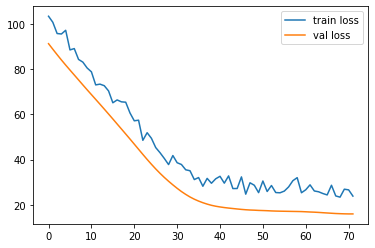

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train loss", "val loss"])
plt.show()

In [ ]:
y_pred_NNK = model.predict(x_test)
print(y_pred_NNK.shape)

(83, 1)


In [ ]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - np.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#https://stackoverflow.com/questions/45250100/kerasregressor-coefficient-of-determination-r2-score
print(len(y_test), len(y_pred_NNK))

83 83


In [ ]:
coeff_determination(y_test, y_pred_NNK)

<tf.Tensor: shape=(), dtype=float64, numpy=0.6679685122966356>

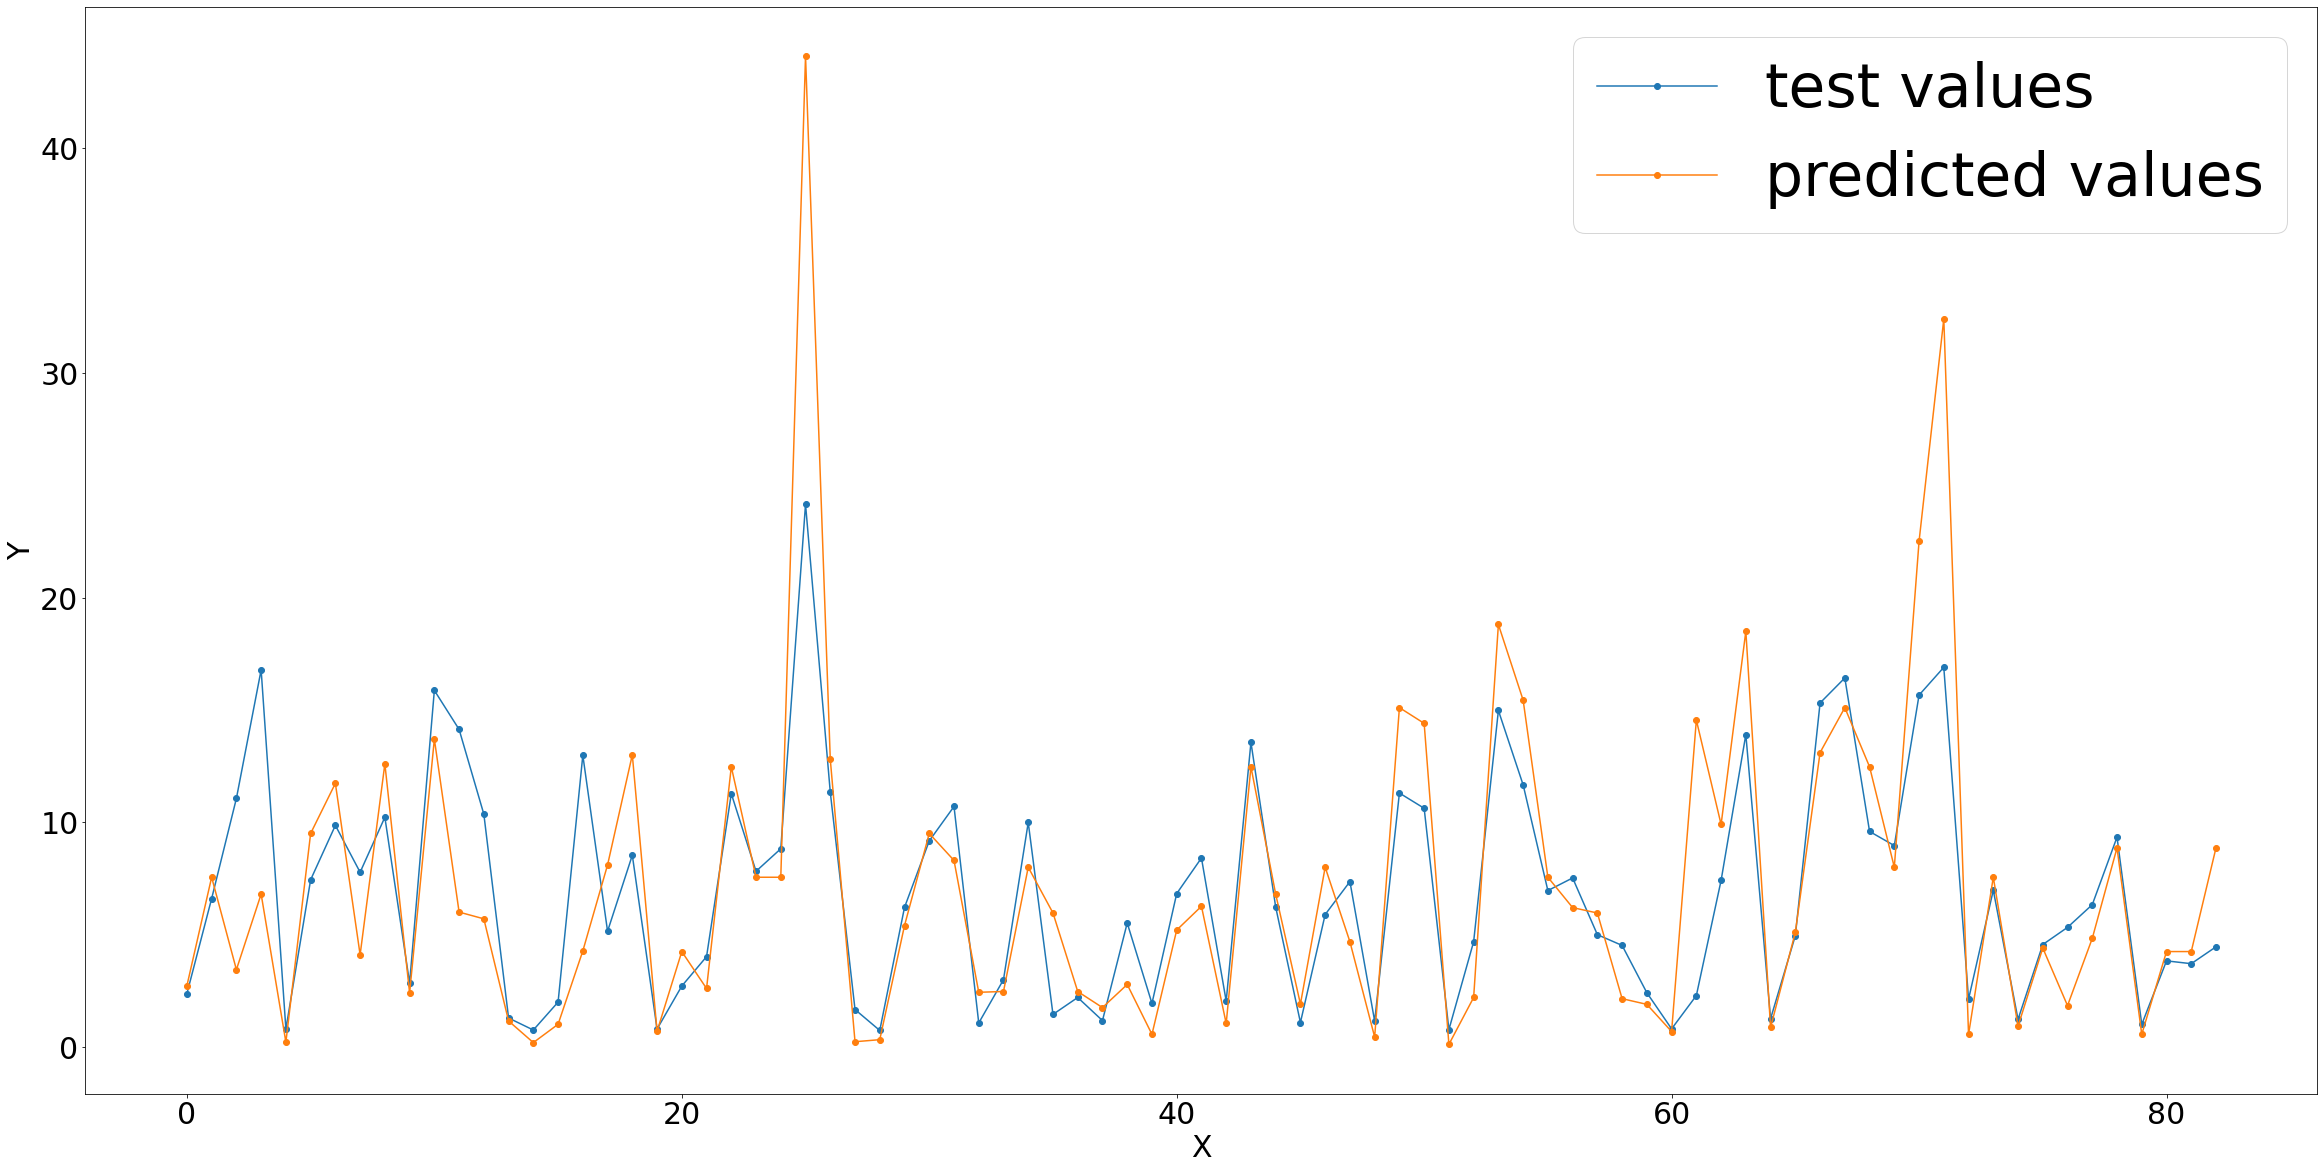

In [ ]:
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_pred_NNK)), y_pred_NNK, label="test values", marker="o")
plt.plot(np.arange(len(y_test)), y_test, label="predicted values", marker="o")
# plt.plot(np.arange(len(y_val)), (pred-y_val), label="error", marker="o")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("X", size=30)
plt.ylabel("Y", size=30)
plt.show()

In [ ]:
error_NNK = y_pred_NNK - y_test
print("Expected value of the error: %.2f" % np.mean(error))
print("variance of data is:", np.var(error))

Expected value of the error: -8.61
variance of data is: CO2 Emissions per Capita (metric tonnes)    18.052114
dtype: float64


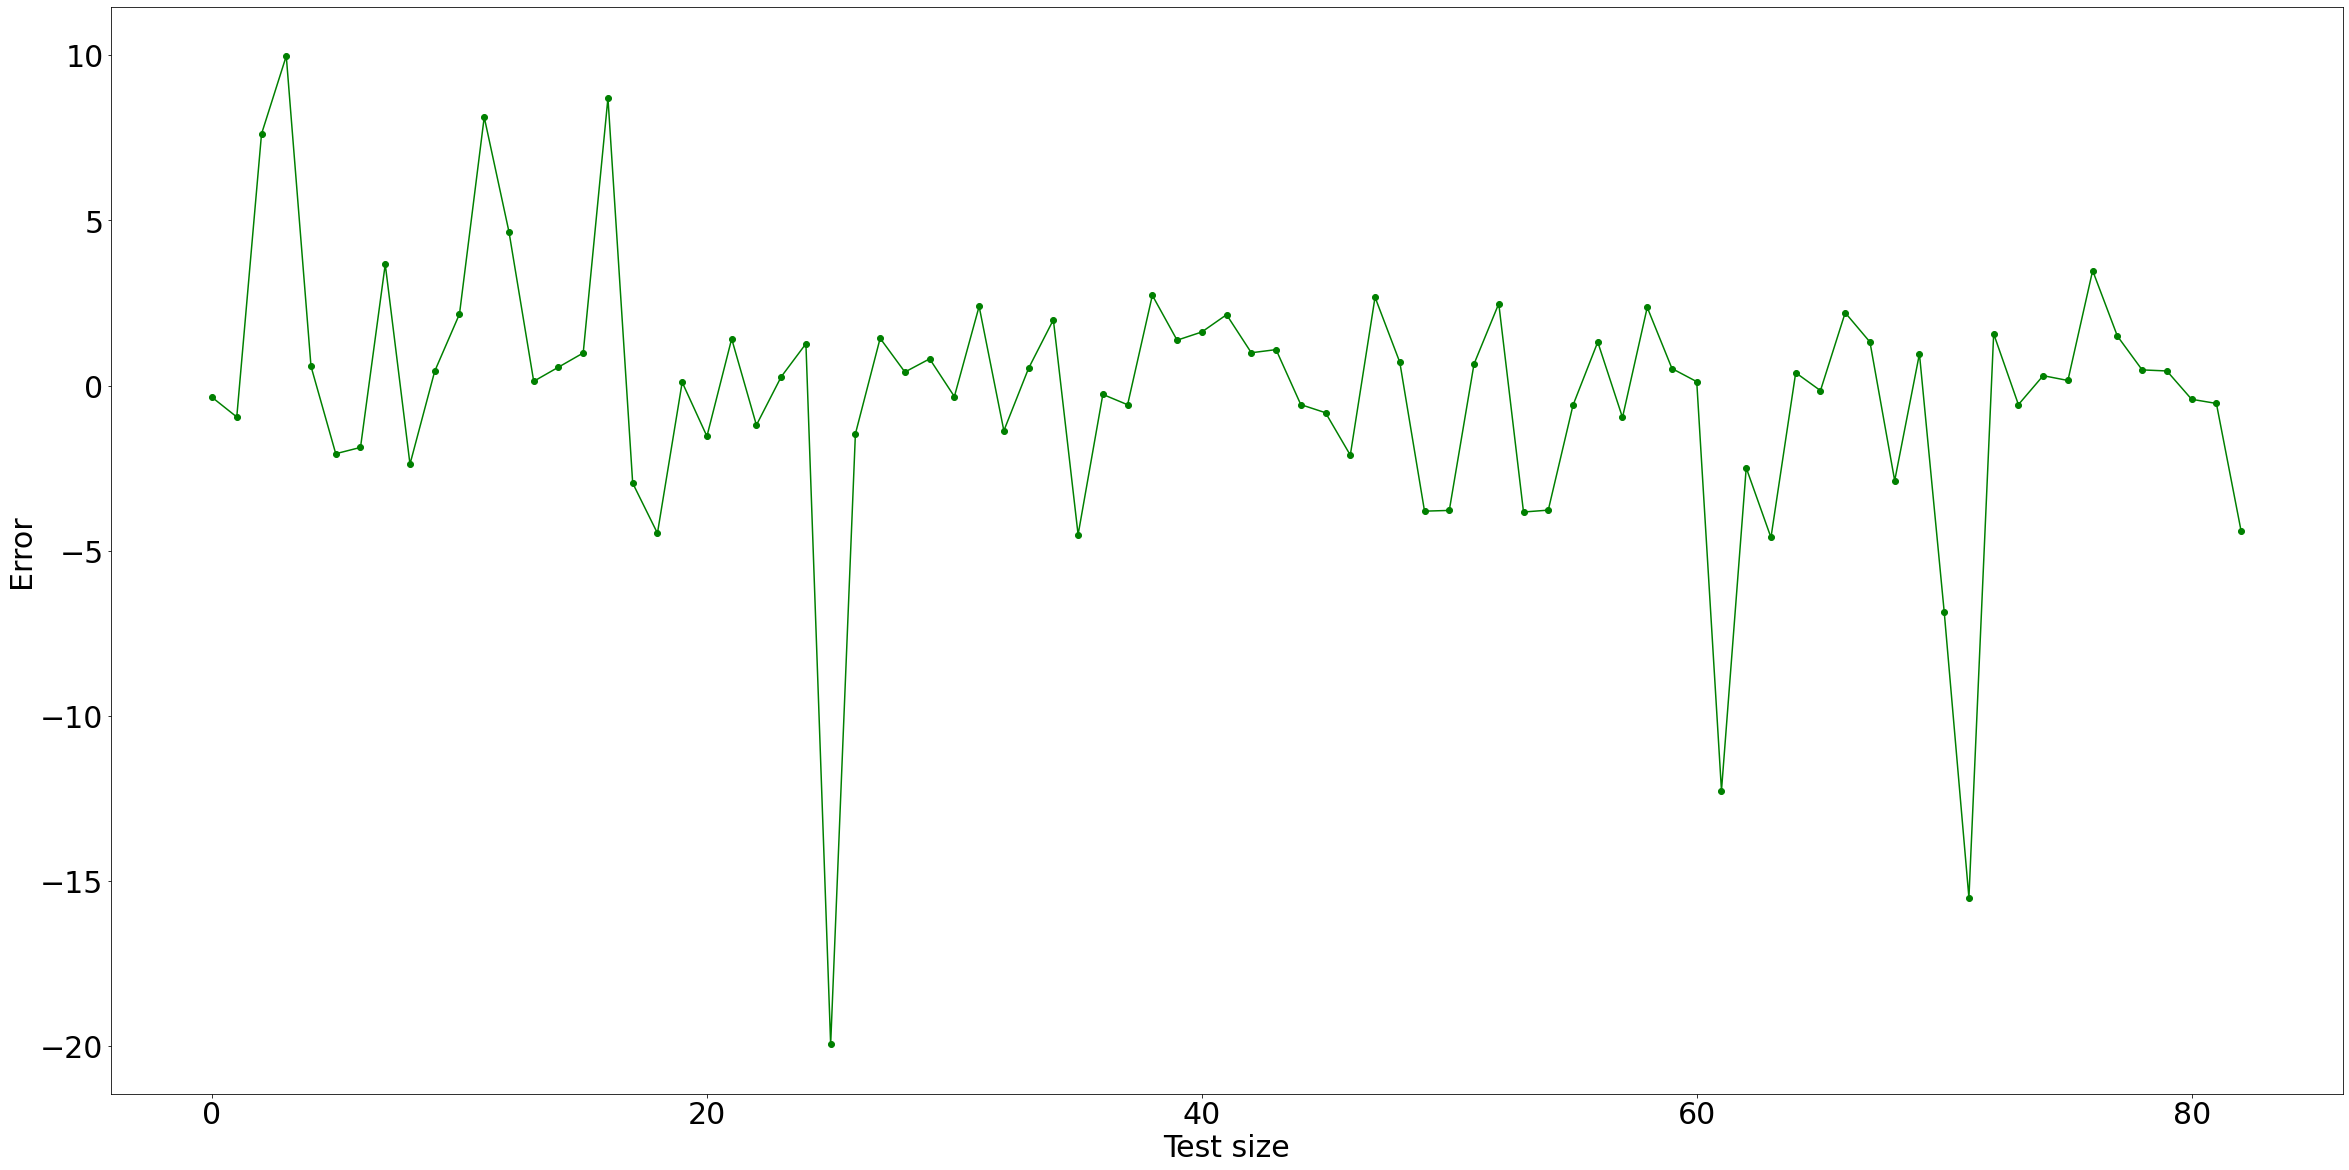

In [ ]:
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_test)), error_NNK, marker="o", c="g")
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("Test size", size=30)
plt.ylabel("Error", size=30)
plt.show()

## 1.3.3 Predictive component's conclusions

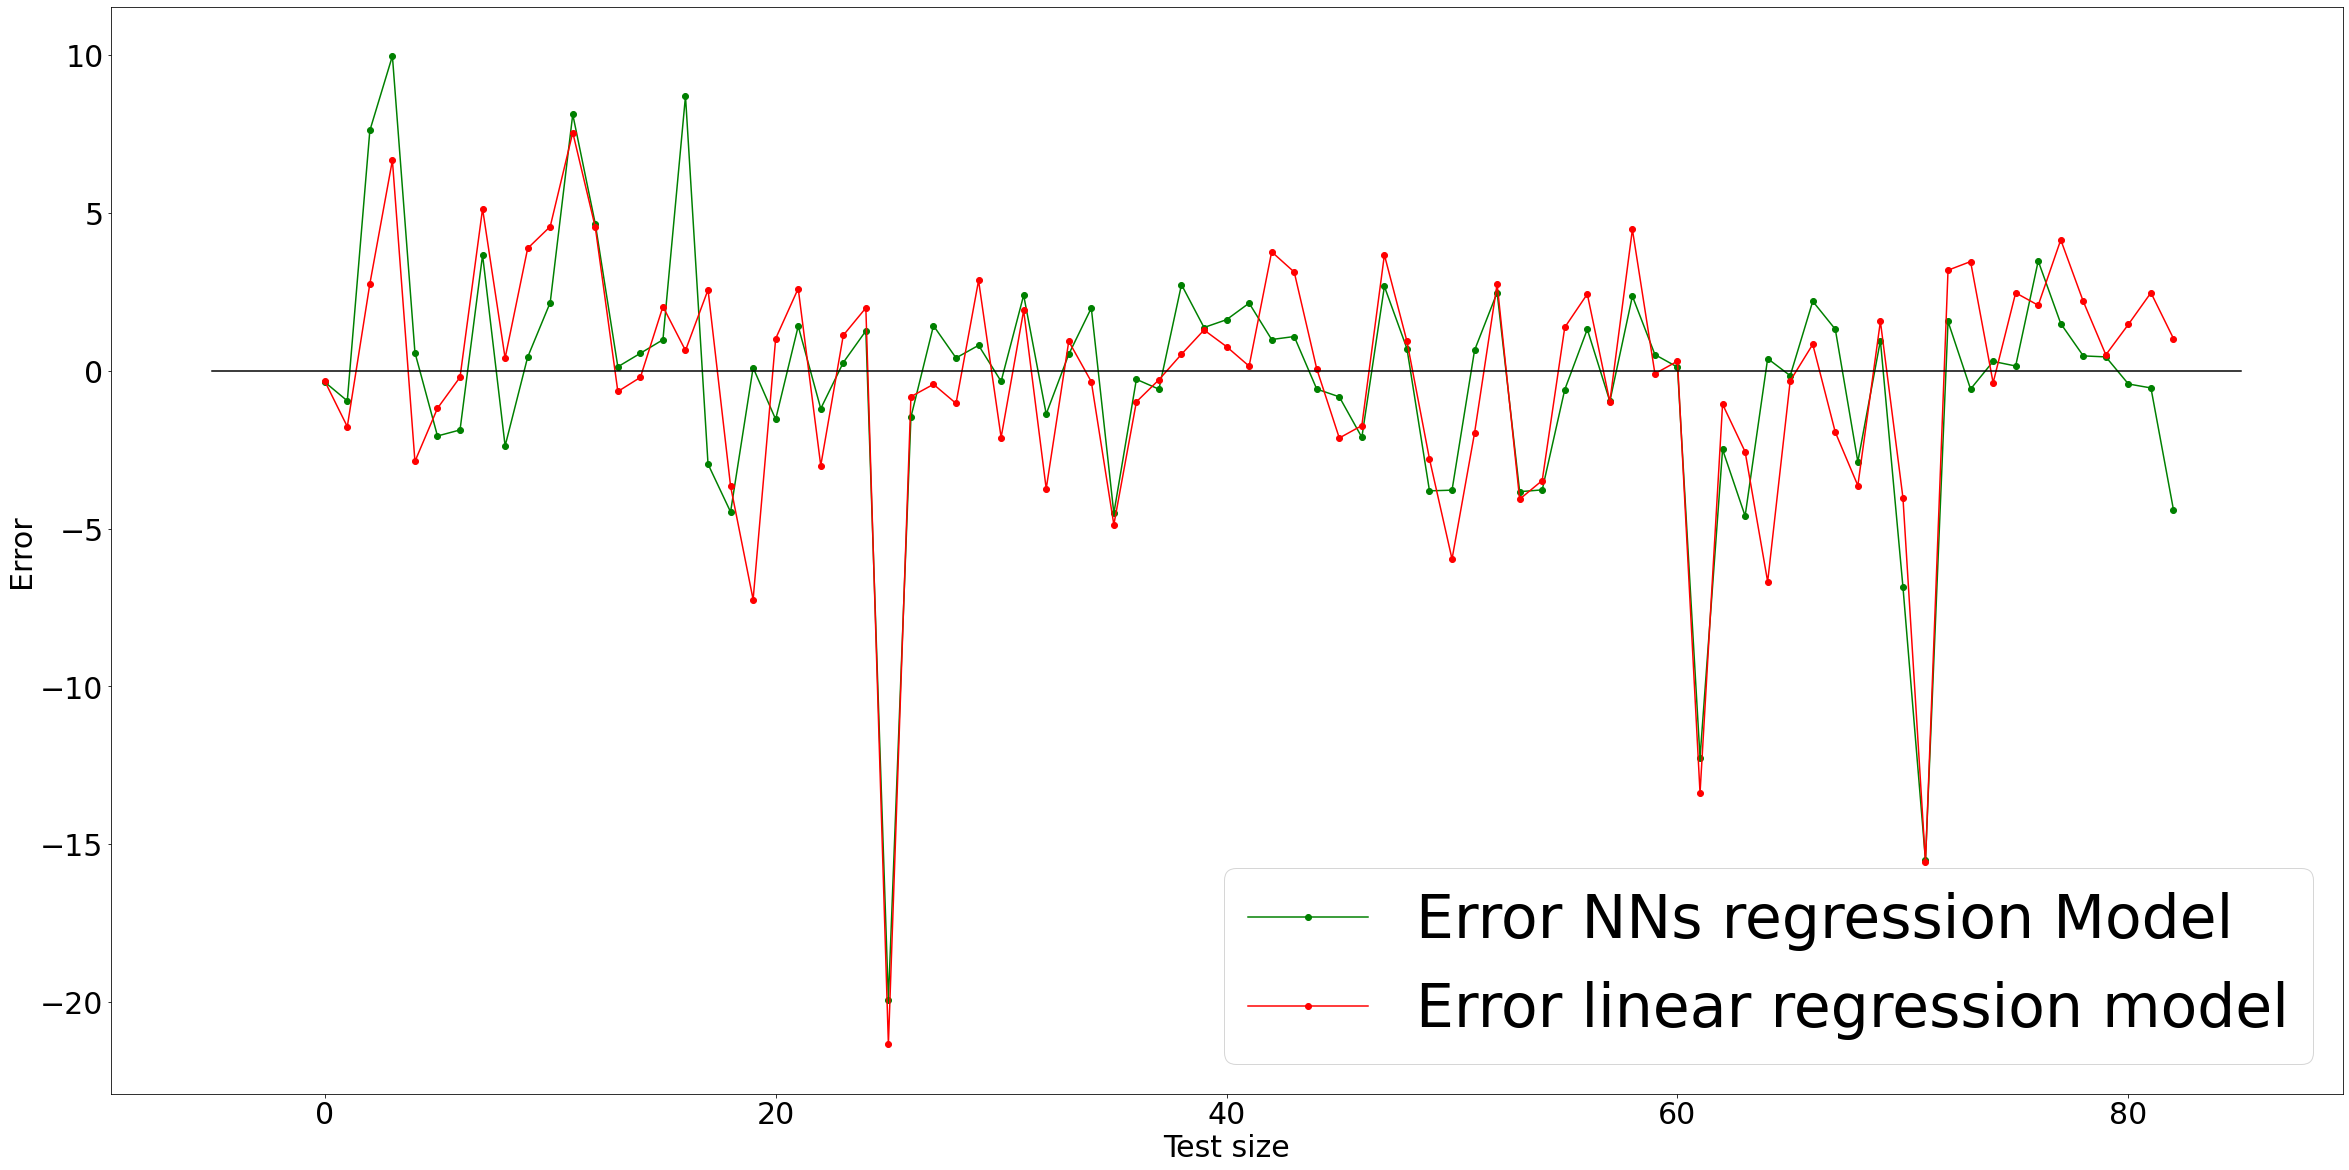

In [ ]:
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_test)), error_NNK, label="Error NNs regression Model", marker="o", c="g")
plt.plot(np.arange(len(y_test)), error_reg, label="Error linear regression model", marker="o", c="r")
plt.plot([-5,85],[0,0], color="black")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("Test size", size=30)
plt.ylabel("Error", size=30)
plt.show()

## 1.3.2 Regression Model after dimensionality reduction

The difference of MSE between training and test sets in the regression model implemented shows that the model that have been implemented might suffer from overfitting. For this reason, it will be implemented a dimensionality reduction with pca, in order to try to reduce the problem.

In [ ]:
from sklearn import decomposition

In [ ]:
pca=decomposition.PCA()

In [ ]:
pca.fit(df2[features])

PCA()

In [ ]:
pca.components_[0]

array([ 3.42212119e-09,  1.74788376e-10,  1.01457289e-11, -6.69254269e-10,
        2.95920559e-09,  4.29029831e-11,  7.04304055e-10,  1.95438985e-09,
        1.06310393e-09, -6.77450608e-14,  1.90619210e-11,  5.50274332e-10,
        2.29909580e-10,  2.67556453e-04,  1.26564839e-07, -4.00413248e-07,
        1.73553123e-09, -2.18056625e-10,  2.06215825e-06,  5.82227787e-10,
        1.99190103e-09,  2.02903108e-11,  9.99999964e-01, -1.06560464e-08,
        4.53502568e-07,  4.79437905e-07, -1.80574911e-13,  1.34165702e-11,
       -2.82814540e-12,  9.22776914e-14, -1.65046769e-13,  5.99633625e-12,
        9.73826547e-12,  2.72290057e-12,  2.73698198e-11, -9.22312550e-12,
       -4.91030934e-12, -1.40501198e-11, -8.91859101e-12,  3.67924690e-11])

In [ ]:
features

Index(['cityID', 'clusterID', 'Gasoline Pump Price (USD/liter)',
       'Road Deaths Rate (per 1000)', 'Subway Length (km)',
       'Subway Stations per Hundred Thousand', 'Subway Ridership per Capita',
       'Subway Age (years)', 'BRT Length (km)',
       'BRT System Length Density (per km)',
       'BRT Stations per Hundred Thousand Persons', 'BRT Age (years)',
       'Bikeshare Age (years)', 'Population', 'Land Area (sq. km)',
       'Population Density (per sq. km)', 'Urbanization Rate 2015 (%)',
       'Urbanization Rate Change 2015 – 2025 (pp)', 'GDP per Capita (USD)',
       'Life Expectancy (years)', 'Internet Penetration',
       'Digital Penetration', 'Street Length Density (m/sq. km)',
       'Street Length Average (m)', 'Intersection Count',
       'Intersection Density (per sq. km)', 'Degree Average',
       'Streets per Node', 'Circuity', 'Self-Loop Proportion',
       'Highway Proportion', 'Metro Propensity Factor',
       'BRT Propensity Factor', 'BikeShare Propensity 

In [ ]:
pca.explained_variance_ratio_

array([9.99997838e-01, 2.16204832e-06, 7.97312640e-11, 3.72065460e-11,
       1.36332258e-12, 4.13353296e-13, 5.13971914e-14, 6.93054388e-16,
       4.00035224e-16, 3.47193456e-16, 8.21754286e-17, 4.51639367e-17,
       2.78495314e-17, 2.50057592e-17, 7.94906588e-18, 3.08534238e-18,
       2.52417935e-18, 1.03042581e-18, 6.14502897e-19, 3.66906616e-19,
       1.29583948e-19, 5.21965892e-20, 4.39562528e-20, 1.34299853e-20,
       8.09079734e-21, 1.75407384e-21, 8.34258890e-22, 4.69676438e-22,
       3.74357065e-22, 3.53964832e-22, 2.56248354e-22, 1.54203257e-22,
       1.25601597e-22, 1.08759393e-22, 9.16835040e-23, 3.92081522e-23,
       2.77478264e-23, 1.43417852e-23, 4.87783686e-24, 1.56355654e-25])

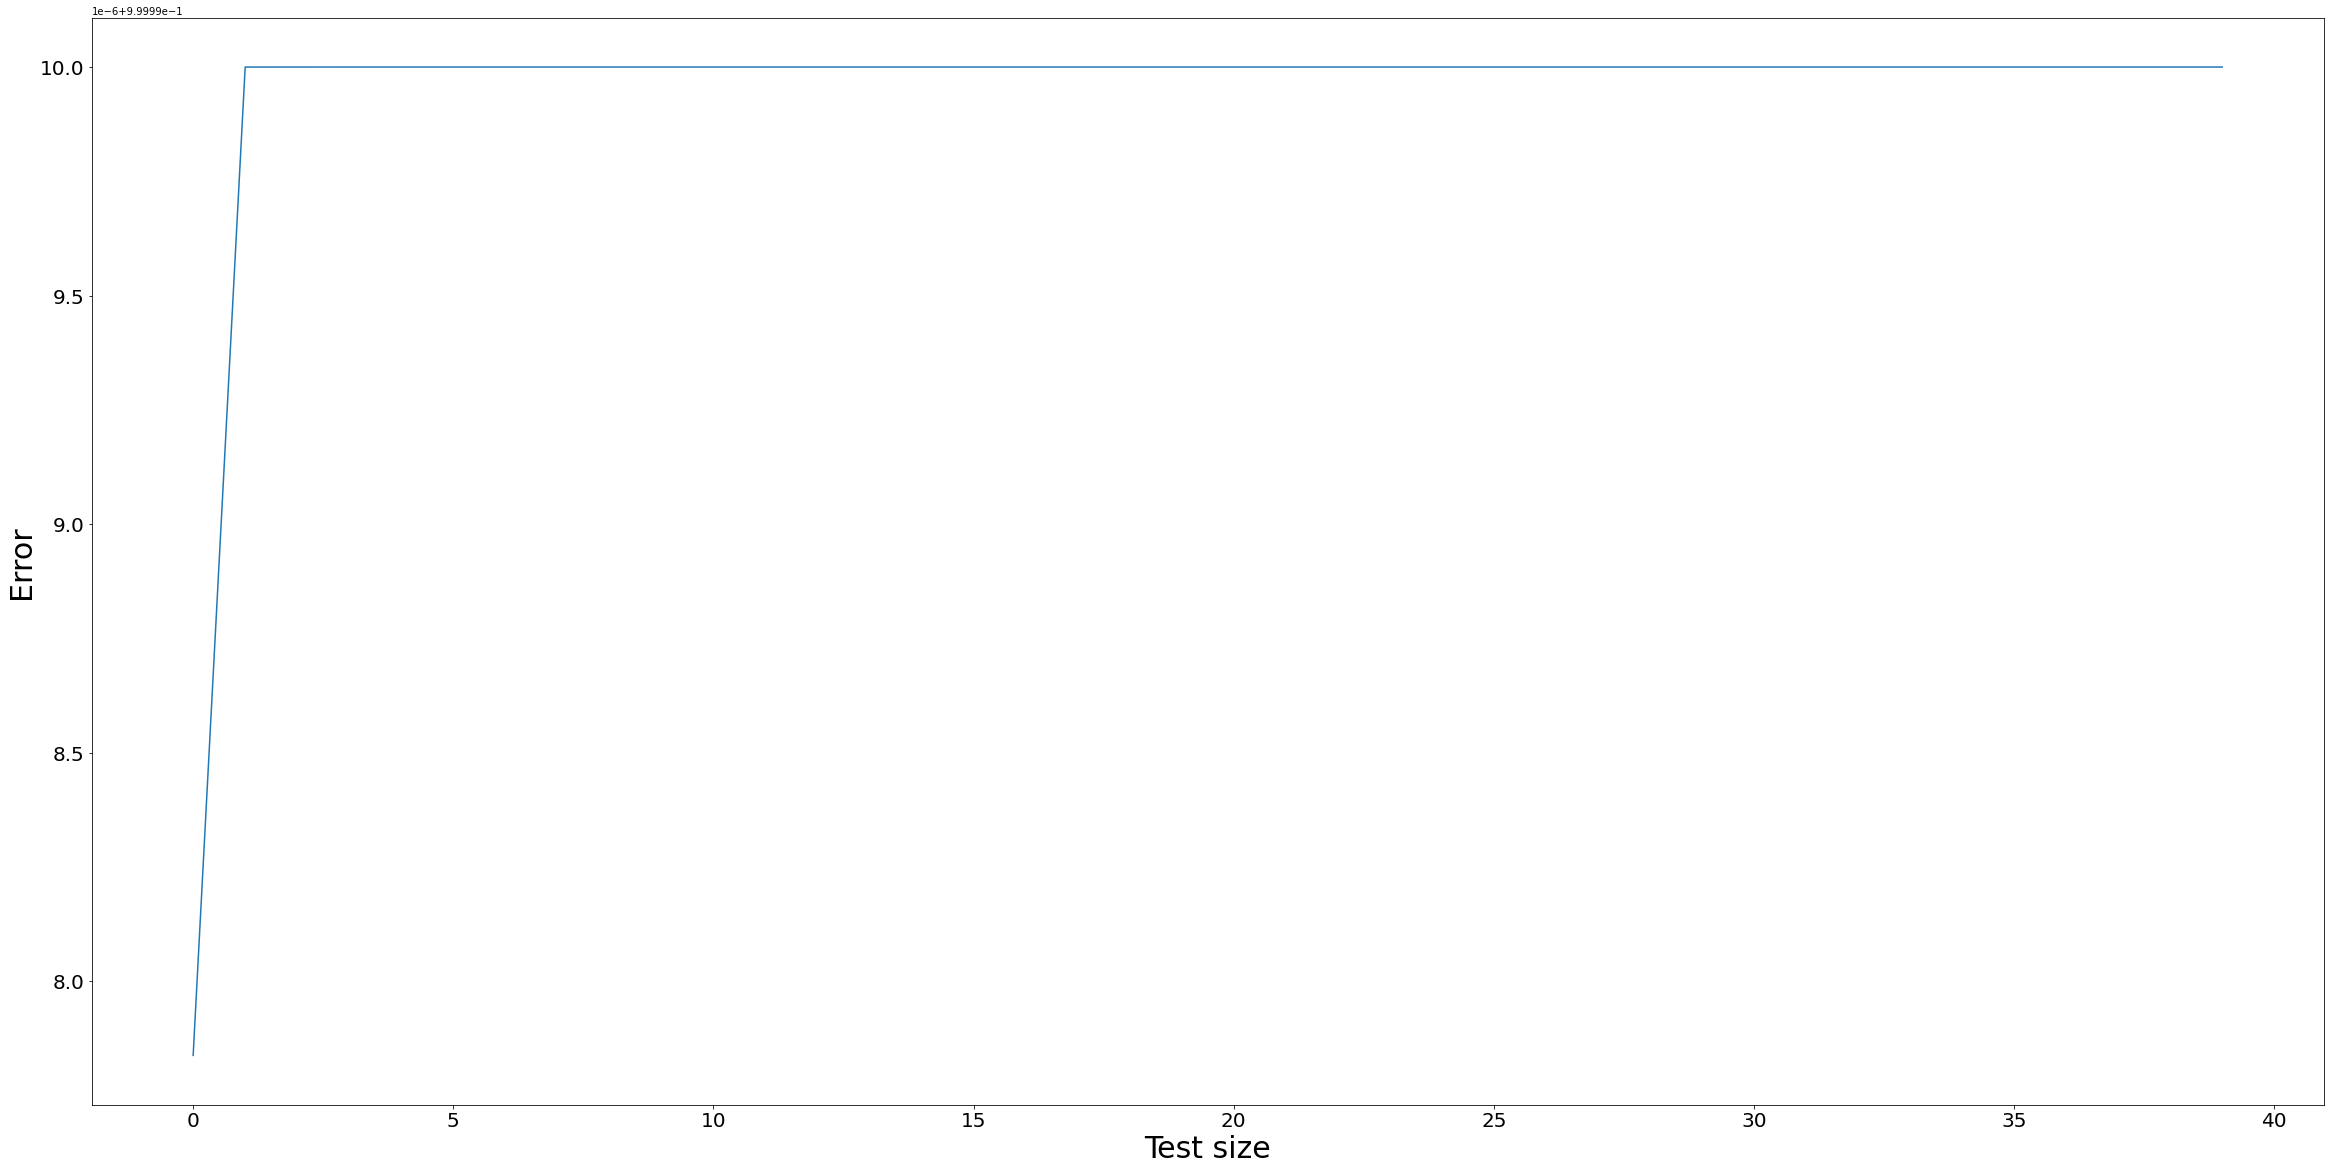

[0.9999978378329136, 0.9999999998812327, 0.9999999999609639, 0.9999999999981705, 0.9999999999995338, 0.9999999999999472, 0.9999999999999986, 0.9999999999999992, 0.9999999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
varianceratio = []
somma = 0
for i in pca.explained_variance_ratio_:
    somma += i
    varianceratio.append(somma)
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(varianceratio)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel("Test size", size=30)
plt.ylabel("Error", size=30)
plt.show()

print(varianceratio)

In [ ]:
expl = []
f = []
for i in range(len(pca.explained_variance_ratio_)):
#     if sum(expl) <= 0.999999998:
    expl.append(pca.explained_variance_ratio_[i])
    f.append(pca.components_[i])
print(expl)

[0.9999978378329136, 2.162048318990853e-06, 7.973126398695766e-11, 3.720654602465804e-11, 1.363322575076853e-12, 4.133532957691391e-13, 5.139719137724588e-14, 6.930543879362402e-16, 4.000352235104815e-16, 3.4719345621203666e-16, 8.217542855835588e-17, 4.51639366914993e-17, 2.78495314262526e-17, 2.5005759188463212e-17, 7.949065877716297e-18, 3.0853423783505996e-18, 2.5241793507129767e-18, 1.0304258146524924e-18, 6.145028965399828e-19, 3.6690661571707765e-19, 1.2958394829669953e-19, 5.219658922317879e-20, 4.395625275283986e-20, 1.3429985292775776e-20, 8.09079734264078e-21, 1.754073844824468e-21, 8.34258889948908e-22, 4.696764376263519e-22, 3.7435706463717574e-22, 3.5396483222409585e-22, 2.5624835433443877e-22, 1.5420325650021997e-22, 1.2560159683771009e-22, 1.0875939312524816e-22, 9.168350397357936e-23, 3.9208152224222147e-23, 2.774782641090062e-23, 1.434178517892287e-23, 4.877836857031183e-24, 1.5635565352602625e-25]


In [ ]:
pca_15 = decomposition.PCA(copy=True, n_components=len(expl), whiten=False)
pca_15.fit(df2[features])

PCA(n_components=40)

In [ ]:
X_reduced15=pca_15.transform(df2[features])

In [ ]:
X_reduced15.shape

(331, 40)

In [ ]:
X_reduced15 = pd.DataFrame(X_reduced15)

In [ ]:
X_reduced15

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.281958e+09,-2.679024e+06,6406.967629,27003.702157,118.396144,-1495.296198,74.506352,-62.120803,30.283656,-30.719277,...,-0.047822,0.004800,0.020235,0.018087,0.016584,-0.000858,-0.006694,-0.007968,0.007077,0.000578
1,3.330796e+09,-1.279604e+06,21322.213653,4676.118105,-1857.609319,-1878.260984,774.050520,162.460933,-109.893922,-88.386795,...,-0.002676,-0.008387,-0.015113,-0.054931,0.059726,0.007986,-0.003730,0.001464,-0.005279,-0.001484
2,-1.825880e+09,-2.419941e+06,-12845.281488,-21738.305182,2259.673634,-278.511773,421.428235,-59.564396,-36.294752,33.754227,...,-0.016173,-0.030280,-0.017174,0.017502,0.014513,-0.015104,-0.003062,-0.005147,0.004387,0.000258
3,-4.166240e+09,4.216228e+06,-19077.001949,-9189.257816,-2271.626605,358.492624,-63.973314,-179.469959,136.150163,-46.307286,...,0.026366,-0.050036,0.002800,0.031741,-0.058043,-0.017181,0.018398,0.001367,0.006355,0.000437
4,-5.105922e+09,3.326358e+05,-17407.885863,-582.946655,-2141.906388,469.893108,-23.298170,162.981898,243.649578,-151.305399,...,-0.060517,0.015254,0.077671,-0.045145,0.027167,-0.007339,-0.033320,0.013982,0.012114,-0.000530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,-1.622124e+08,-8.500563e+05,-5052.372775,-16407.450539,-4801.085926,-1024.409772,131.557090,-83.955821,-11.948836,-3.579694,...,-0.073469,-0.039151,0.061789,0.000385,-0.006801,0.000690,0.019082,-0.014725,0.005358,-0.000864
327,-2.840121e+09,-6.185821e+05,-16608.561834,-16665.850825,-633.818779,-292.360140,155.953145,14.503386,-40.077022,-9.893871,...,0.023939,0.006831,-0.013931,-0.009733,0.011531,0.000320,-0.010902,0.002143,0.000146,-0.001131
328,7.521237e+08,-1.374658e+06,17762.048558,-10153.867273,4648.478602,-1233.136048,-151.609468,-96.909166,4.152551,9.056716,...,-0.027722,-0.052738,-0.019877,0.006536,-0.023997,0.006796,0.016009,0.001434,0.006855,0.000140
329,1.939708e+09,-2.224151e+05,10497.277261,-9660.670775,915.182139,-1624.622191,-413.041268,-79.193263,31.646974,48.892072,...,-0.049109,-0.021930,0.010012,-0.002128,-0.020258,0.018198,0.008599,0.002090,-0.003375,0.000100


In [ ]:
x_train15 = X_reduced15[:round(len(X_reduced15)*0.75)]
y_train15 = training_set[['CO2 Emissions per Capita (metric tonnes)']]
print("Train: ", x_train15.shape, y_train15.shape)
print("----------------------------")
x_test15 = X_reduced15[round(len(X_reduced15)*0.75):]
y_test15 = test_set[['CO2 Emissions per Capita (metric tonnes)']]
print("Test: ", x_test15.shape, y_test15.shape)

Train:  (248, 40) (248, 1)
----------------------------
Test:  (83, 40) (83, 1)


In [ ]:
lr_reduced=linear_model.LinearRegression(fit_intercept=False)
lr_reduced.fit(x_train15, y_train15)

LinearRegression(fit_intercept=False)

In [ ]:
y_pred_reduced = lr_reduced.predict(x_test15)

In [ ]:
MSE_reduced = mean_squared_error(y_pred_reduced, y_test15)

In [ ]:
MSE_reduced

92.19230062933248

In [ ]:
lr_reduced.score(x_train15, y_train15)

-0.4964596016086782

In [ ]:
lr_reduced.score(x_test15, y_test15)

-0.8181164508583036

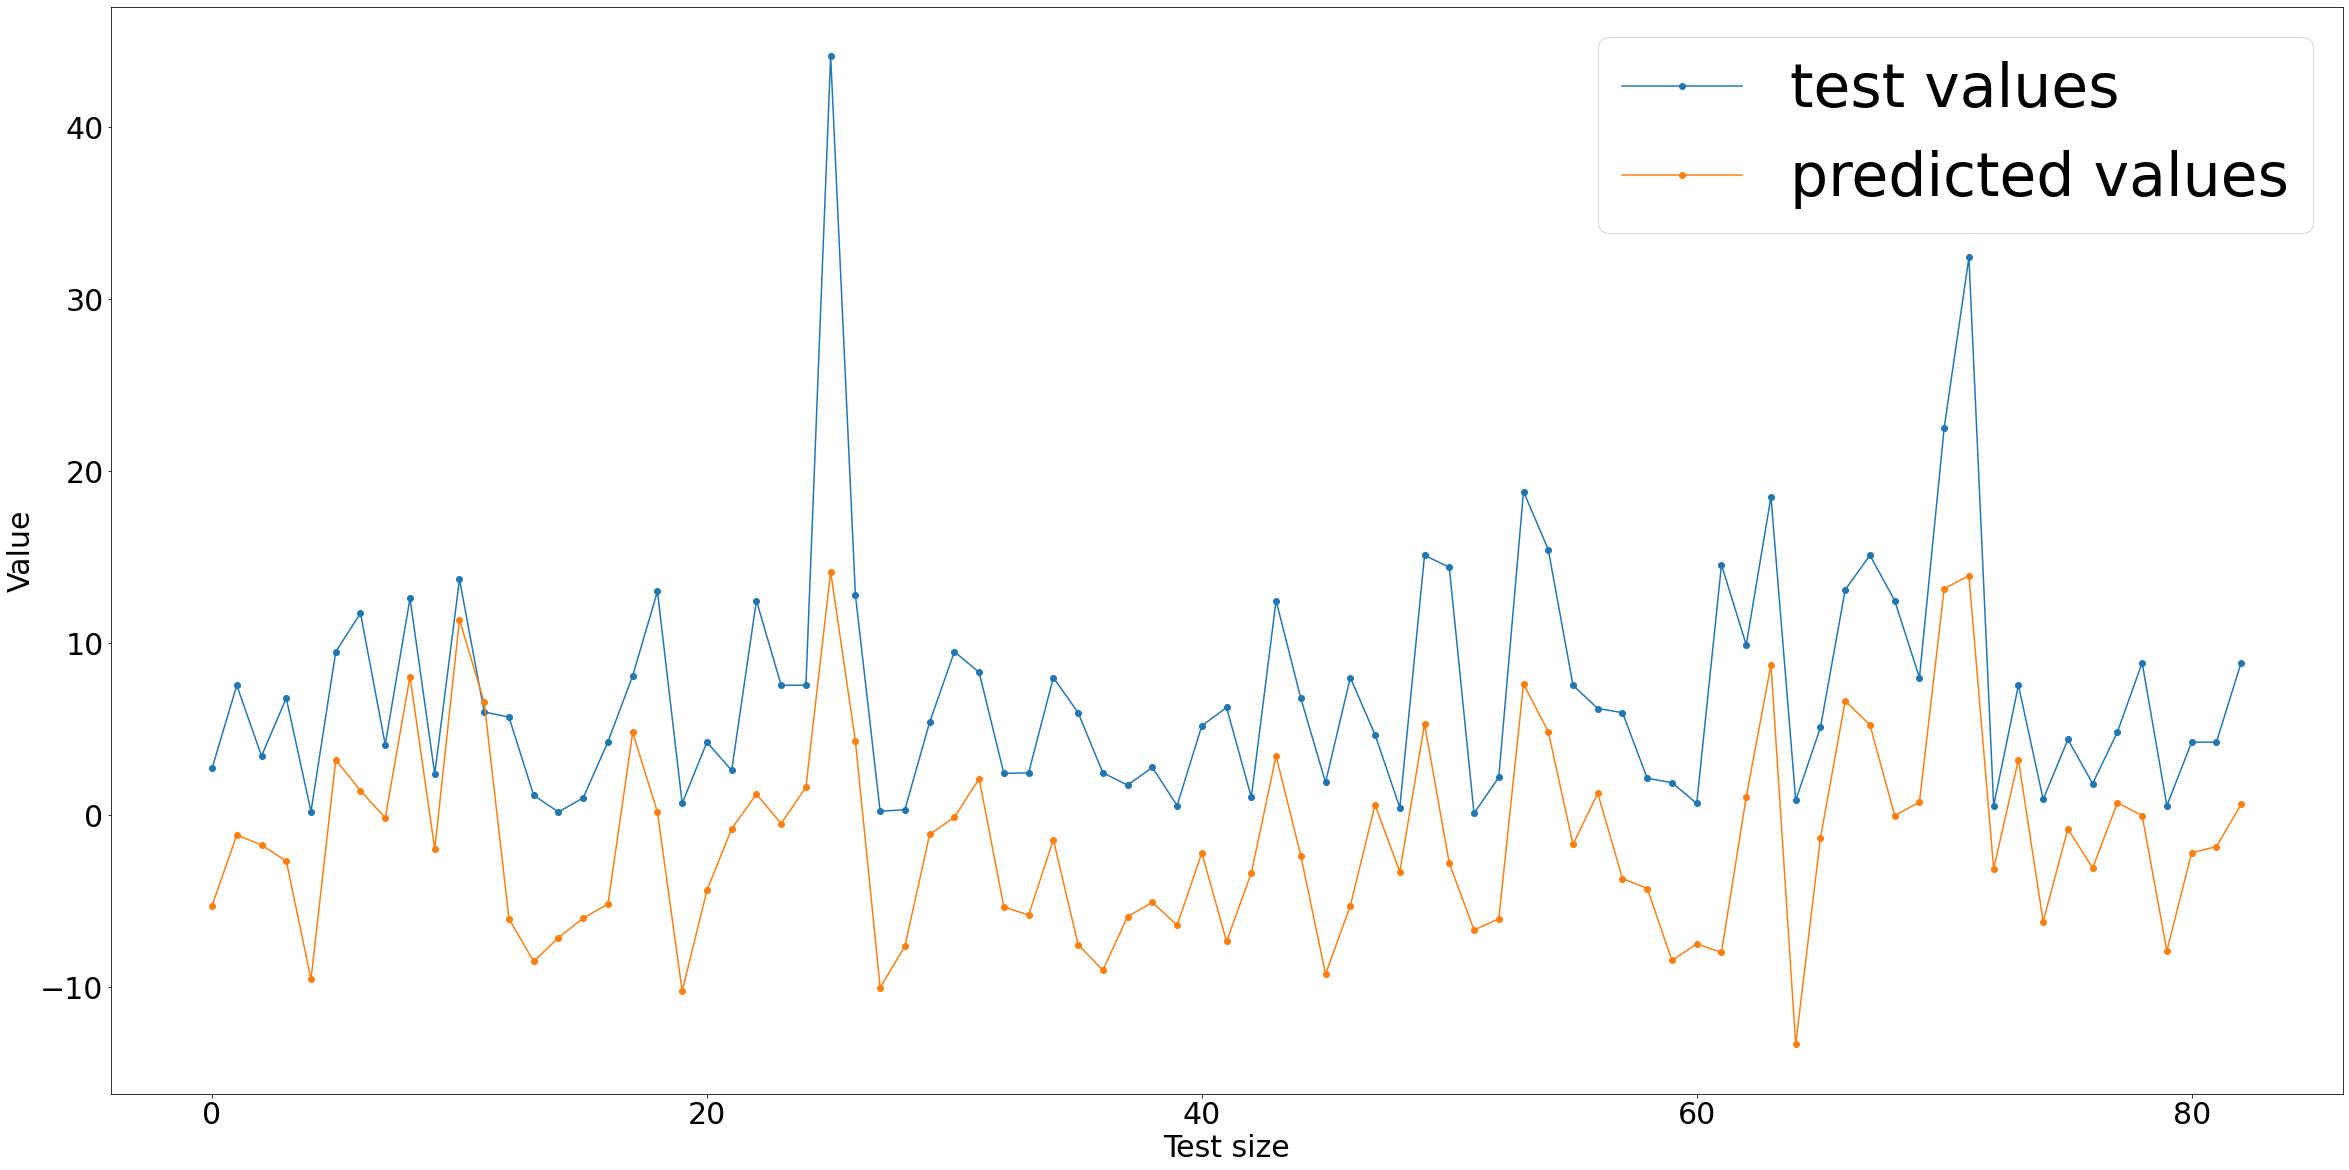

In [ ]:
plt.figure(num=None, figsize=(40, 20), facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_test15)), y_test15, label="test values", marker="o")
plt.plot(np.arange(len(y_pred_reduced)), y_pred_reduced, label="predicted values", marker="o")
plt.legend(prop={'size':60})
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel("Test size", size=30)
plt.ylabel("Value", size=30)
plt.show()

In [ ]:
error = y_pred_reduced - y_test15
print("Expected value of the error: %.2f" % np.mean(error))
print("variance of data is:", np.var(error))

Expected value of the error: -8.61
variance of data is: CO2 Emissions per Capita (metric tonnes)    18.052114
dtype: float64
